In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir("/content/drive/My Drive/Coolyeah/Semester 7/Data Mining/")
os.listdir()

['default of credit card clients.xls', 'scene 3']

In [4]:
df=pd.read_excel("default of credit card clients.xls")

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

Isi tabel data

| Variable Name | Role    | Type    | Demographic        | Description                  | Units | Missing Values |
|---------------|---------|---------|---------------------|------------------------------|--------|----------------|
| ID            | ID      | Integer |                     |                              |        | no             |
| X1            | Feature | Integer |                     | LIMIT_BAL                    |        | no             |
| X2            | Feature | Integer | Sex                 | SEX                          |        | no             |
| X3            | Feature | Integer | Education Level     | EDUCATION                    |        | no             |
| X4            | Feature | Integer | Marital Status      | MARRIAGE                     |        | no             |
| X5            | Feature | Integer | Age                 | AGE                          |        | no             |
| X6            | Feature | Integer |                     | PAY_0                        |        | no             |
| X7            | Feature | Integer |                     | PAY_2                        |        | no             |
| X8            | Feature | Integer |                     | PAY_3                        |        | no             |
| X9            | Feature | Integer |                     | PAY_4                        |        | no             |
| X10           | Feature | Integer |                     | PAY_5                        |        | no             |
| X11           | Feature | Integer |                     | PAY_6                        |        | no             |
| X12           | Feature | Integer |                     | BILL_AMT1                    |        | no             |
| X13           | Feature | Integer |                     | BILL_AMT2                    |        | no             |
| X14           | Feature | Integer |                     | BILL_AMT3                    |        | no             |
| X15           | Feature | Integer |                     | BILL_AMT4                    |        | no             |
| X16           | Feature | Integer |                     | BILL_AMT5                    |        | no             |
| X17           | Feature | Integer |                     | BILL_AMT6                    |        | no             |
| X18           | Feature | Integer |                     | PAY_AMT1                     |        | no             |
| X19           | Feature | Integer |                     | PAY_AMT2                     |        | no             |
| X20           | Feature | Integer |                     | PAY_AMT3                     |        | no             |
| X21           | Feature | Integer |                     | PAY_AMT4                     |        | no             |
| X22           | Feature | Integer |                     | PAY_AMT5                     |        | no             |
| X23           | Feature | Integer |                     | PAY_AMT6                     |        | no             |
| Y             | Target  | Binary  |                     | default payment next month   |        | no             |



*   X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* X2: Gender (1 = male; 2 = female).
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* X4: Marital status (1 = married; 2 = single; 3 = others).
* X5: Age (year).
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005;
* X7 = the repayment status in August, 2005; . . .;
* X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005;
* X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.





In [6]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [7]:
print(df.isnull().sum())

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64


In [8]:
print("\nJumlah duplikasi:", df.duplicated().sum())



Jumlah duplikasi: 0


In [9]:
data = df.drop(columns=['Unnamed: 0'])

In [10]:
numeric_cols = data.drop(columns='Y').columns

In [11]:
data = data.drop(index=0).reset_index(drop=True)

In [12]:
data[numeric_cols] = data[numeric_cols].astype(int)

In [13]:
data['Y'] = data['Y'].astype(int)

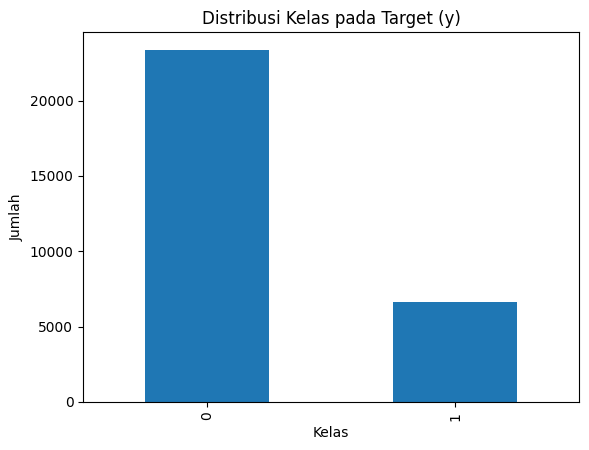

In [14]:
import matplotlib.pyplot as plt

data['Y'].value_counts().plot(kind='bar')
plt.title('Distribusi Kelas pada Target (y)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()


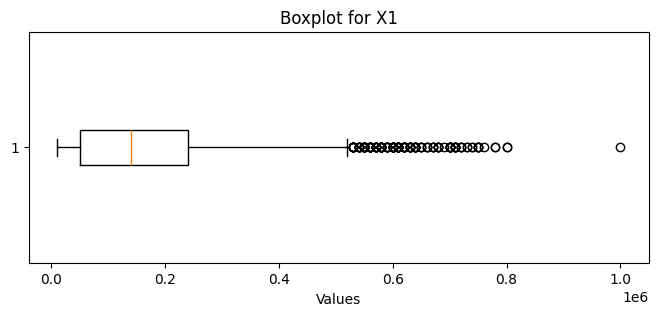

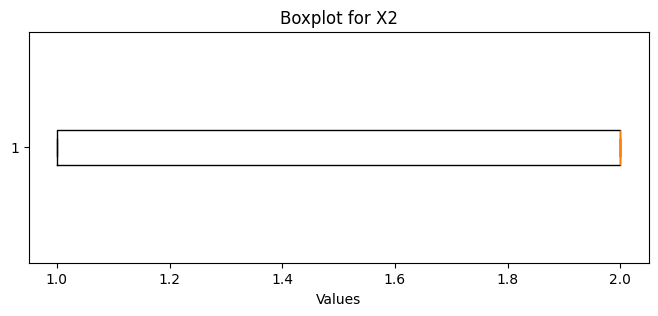

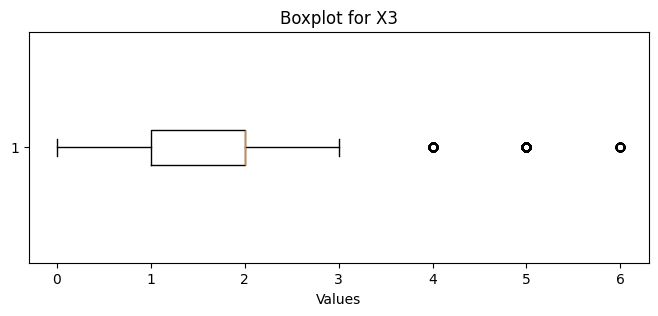

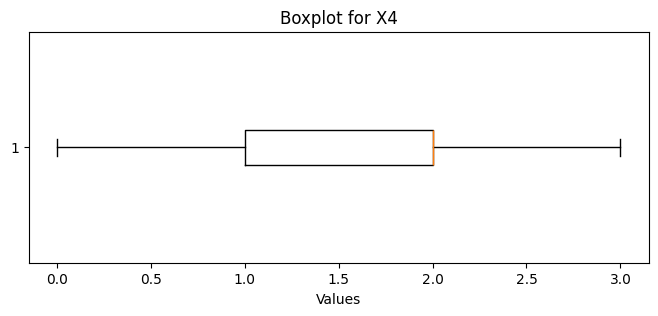

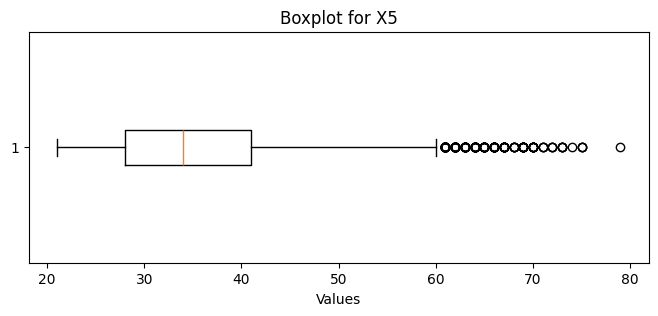

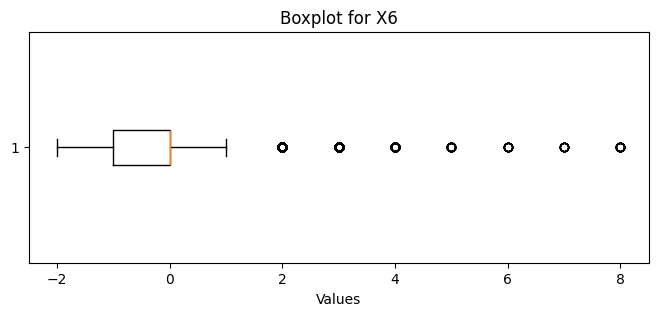

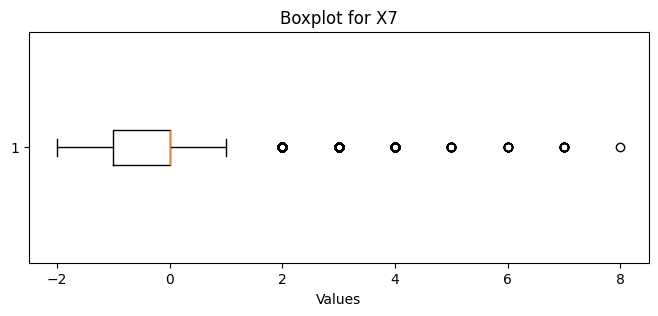

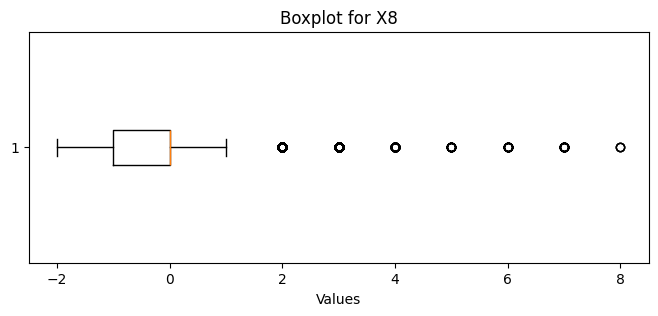

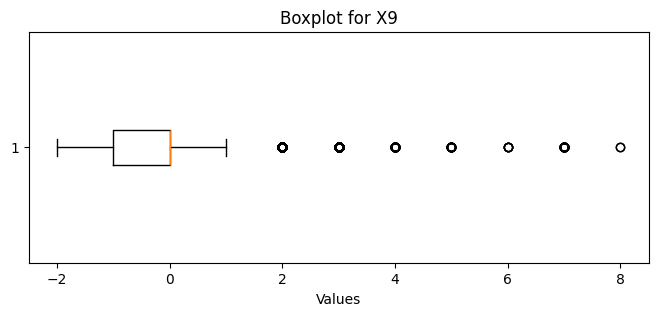

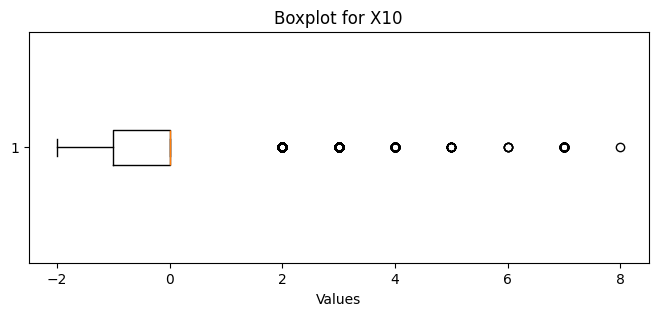

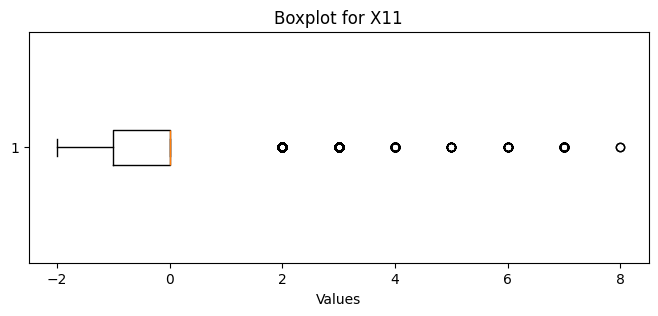

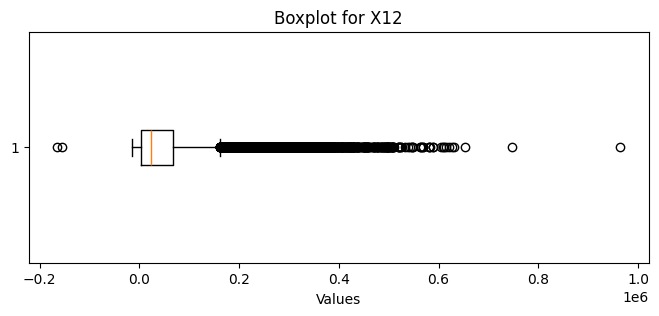

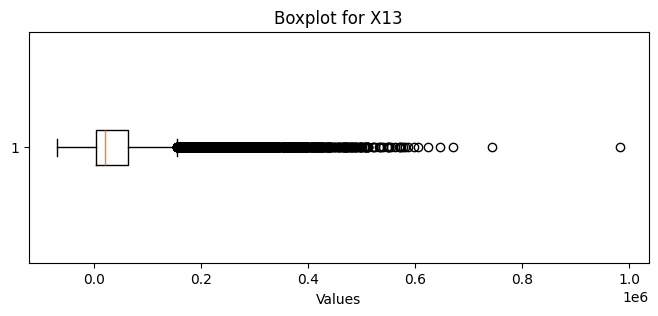

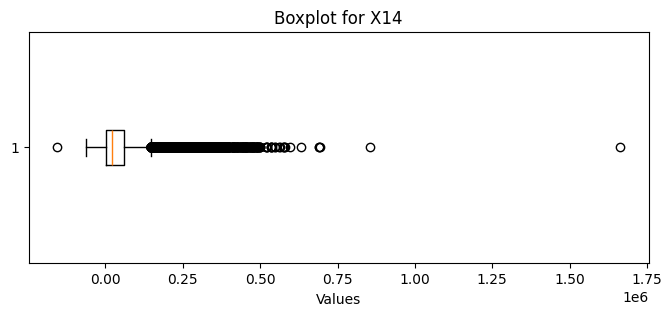

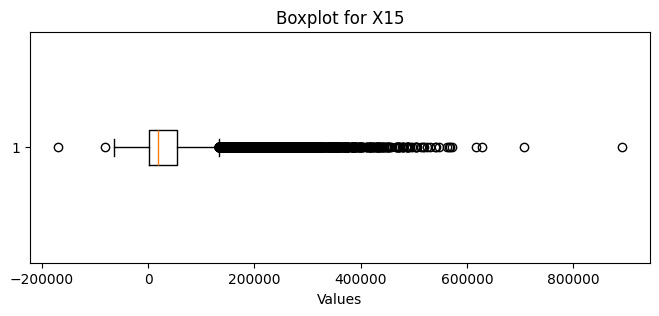

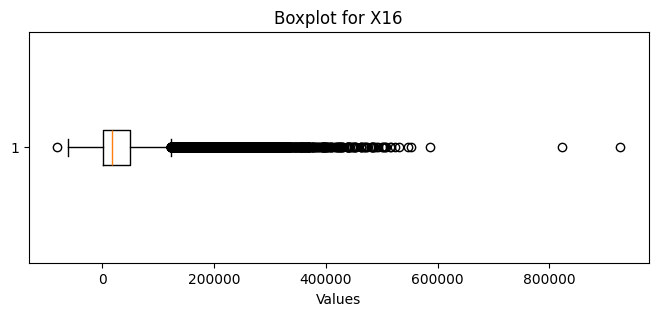

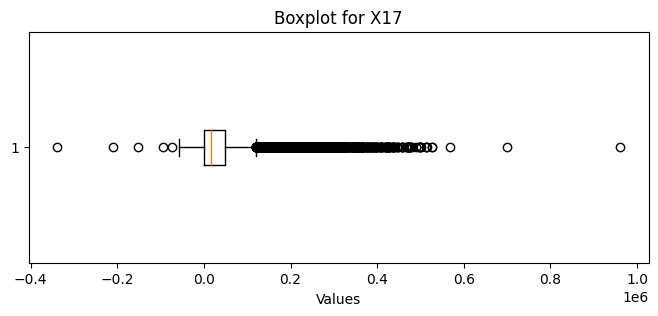

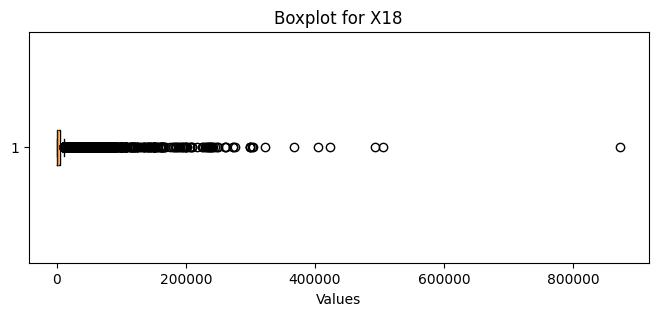

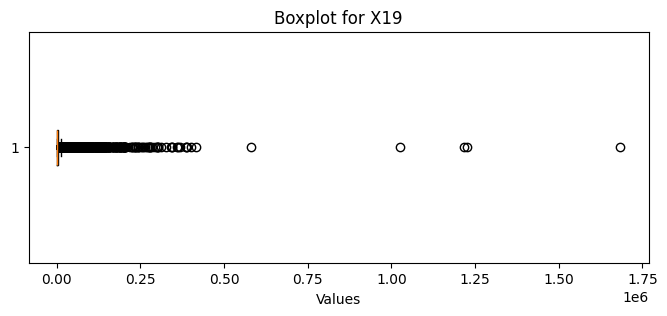

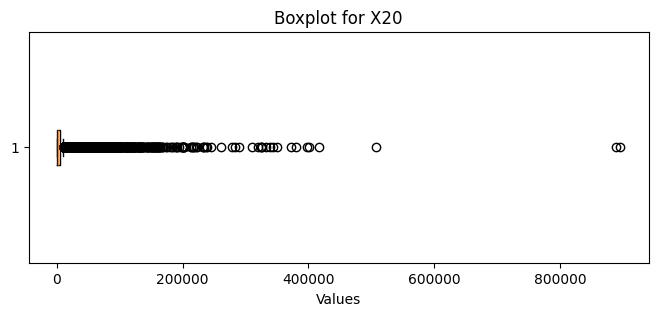

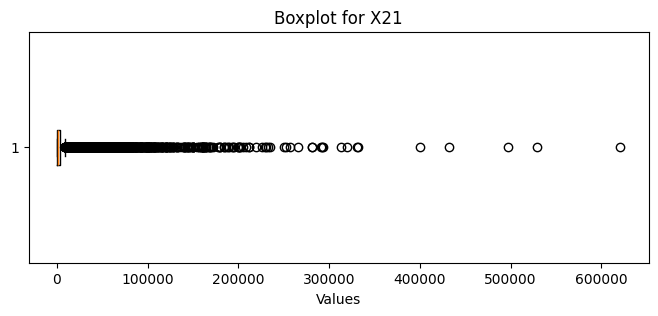

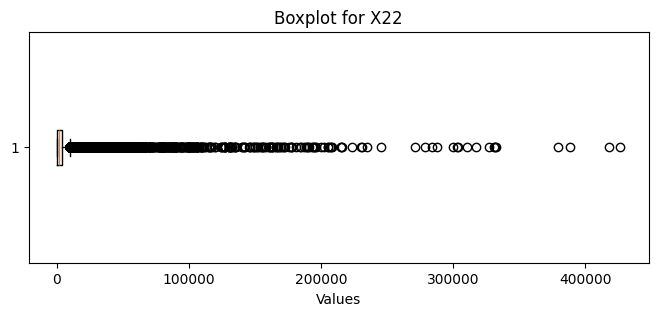

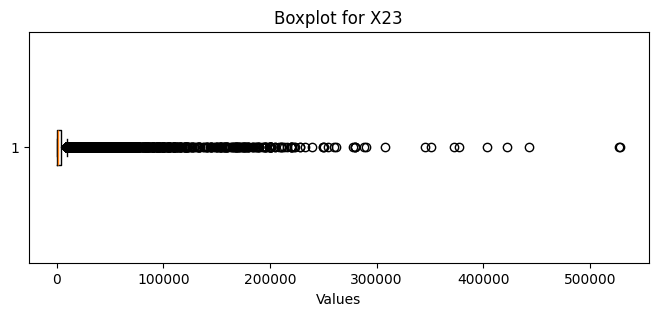

In [15]:
for col in numeric_cols:
    plt.figure(figsize=(8, 3))
    plt.boxplot(data[col], vert=False)
    plt.title(f'Boxplot for {col}')
    plt.xlabel('Values')
    plt.show()


In [16]:
for col in data.columns:
    print(f"\n=== {col} ===")
    print(df[col].unique())



=== X1 ===
['LIMIT_BAL' 20000 120000 90000 50000 500000 100000 140000 200000 260000
 630000 70000 250000 320000 360000 180000 130000 450000 60000 230000
 160000 280000 10000 40000 210000 150000 380000 310000 400000 80000 290000
 340000 300000 30000 240000 470000 480000 350000 330000 110000 420000
 170000 370000 270000 220000 190000 510000 460000 440000 410000 490000
 390000 580000 600000 620000 610000 700000 670000 680000 430000 550000
 540000 1000000 530000 710000 560000 520000 750000 640000 16000 570000
 590000 660000 720000 327680 740000 800000 760000 690000 650000 780000
 730000]

=== X2 ===
['SEX' 2 1]

=== X3 ===
['EDUCATION' 2 1 3 5 4 6 0]

=== X4 ===
['MARRIAGE' 1 2 3 0]

=== X5 ===
['AGE' 24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22
 25 31 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66
 62 70 72 64 65 71 69 68 79 74]

=== X6 ===
['PAY_0' 2 -1 0 -2 1 3 4 8 7 5 6]

=== X7 ===
['PAY_2' 2 0 -1 -2 3 5 7 4 1 6 8]

=== X8 ===
['PAY_3' -1 0 2 -

## PreProcessing


Menambahkan feature engineering untuk membuat data lebih relevan

In [17]:
import numpy as np
import pandas as pd

def add_features(df):

    pay_cols = ['X6','X7','X8','X9','X10','X11']

    # Total keterlambatan bulan (hanya hitung nilai positif)
    df['PAY_TOTAL'] = df[pay_cols].apply(lambda x: sum(v for v in x if v > 0), axis=1)

    # Jumlah bulan terlambat bayar
    df['PAY_DELAY_COUNT'] = (df[pay_cols] > 0).sum(axis=1)

    # Keterlambatan maksimum
    df['PAY_MAX'] = df[pay_cols].max(axis=1)

    # Trend keterlambatan (slope linear regression)
    df['PAY_TREND'] = df[pay_cols].apply(lambda row: np.polyfit(range(6), row, 1)[0], axis=1)

    # Bill Statement Features (BILL_AMT1–6)
    bill_cols = ['X12','X13','X14','X15','X16','X17']

    df['BILL_TOTAL'] = df[bill_cols].sum(axis=1)
    df['BILL_AVG']   = df[bill_cols].mean(axis=1)
    df['BILL_STD']   = df[bill_cols].std(axis=1)
    df['BILL_MAX']   = df[bill_cols].max(axis=1)
    df['BILL_MIN']   = df[bill_cols].min(axis=1)

    # Payment Amount Features (PAY_AMT1–6)
    pay_amt_cols = ['X18','X19','X20','X21','X22','X23']

    df['PAY_AMT_TOTAL'] = df[pay_amt_cols].sum(axis=1)
    df['PAY_AMT_AVG']   = df[pay_amt_cols].mean(axis=1)
    df['PAY_AMT_STD']   = df[pay_amt_cols].std(axis=1)

    # Persentase pembayaran terhadap total tagihan
    df['PAY_RATIO'] = df['PAY_AMT_TOTAL'] / (df['BILL_TOTAL'] + 1)

    # Credit Utilization Features
    df['UTIL_AVG']  = df['BILL_AVG'] / (df['X1'] + 1)
    df['UTIL_LAST'] = df['X12'] / (df['X1'] + 1)

    # Limit Ratios
    df['PAY_LIMIT_RATIO']  = df['PAY_AMT_TOTAL'] / (df['X1'] + 1)
    df['BILL_LIMIT_RATIO'] = df['BILL_TOTAL'] / (df['X1'] + 1)

    # Behavioral Change Indicators
    # bill terbaru - bill paling lama
    df['BILL_CHANGE']     = df['X12'] - df['X17']
    # payment terbaru - payment paling lama
    df['PAY_AMT_CHANGE']  = df['X18'] - df['X23']

    # Age Binning (lebih bagus untuk linear models)
    df['AGE_BIN'] = pd.cut(
        df['X5'],
        bins=[20, 30, 40, 50, 60, 120],
        labels=[1, 2, 3, 4, 5]
    )

    # Convert AGE_BIN to numeric
    df['AGE_BIN'] = df['AGE_BIN'].astype(float)

    return df


In [18]:
dfe = add_features(data)

### Split Data

In [19]:
X = dfe.drop(columns=['Y'])
y = dfe['Y']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [21]:
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,PAY_AMT_AVG,PAY_AMT_STD,PAY_RATIO,UTIL_AVG,UTIL_LAST,PAY_LIMIT_RATIO,BILL_LIMIT_RATIO,BILL_CHANGE,PAY_AMT_CHANGE,AGE_BIN
10029,340000,2,1,2,30,-1,-1,-1,-1,0,...,20738.166667,15530.485664,0.865202,0.070497,0.025209,0.365967,0.422981,-12120,-2808,1.0
17540,100000,2,2,1,36,1,2,2,2,2,...,1750.000000,1474.788120,0.051973,0.336710,0.321957,0.104999,2.020260,-3241,-3500,2.0
20357,130000,1,3,1,27,-1,-1,-1,-1,-2,...,1636.500000,1498.791480,1.498169,0.008401,0.003846,0.075530,0.050407,-2199,-1766,1.0
20217,150000,2,1,1,51,1,-2,-2,-2,-2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,4.0
17264,240000,2,2,1,46,0,0,0,0,-2,...,2262.166667,3508.584354,0.026449,0.356375,0.738418,0.056554,2.138249,177221,7053,3.0


In [22]:
column_names = ['X1','X3','X4','X18','X19','X20','X21','X22','X23']

def cap_outliers(col):
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    X_train[col] = np.clip(X_train[col], lower, upper)

    #di apply pada data test juga
    X_test[col] = np.clip(X_test[col], lower, upper)

In [23]:
for col in column_names:
    cap_outliers(col)

In [24]:
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,PAY_AMT_AVG,PAY_AMT_STD,PAY_RATIO,UTIL_AVG,UTIL_LAST,PAY_LIMIT_RATIO,BILL_LIMIT_RATIO,BILL_CHANGE,PAY_AMT_CHANGE,AGE_BIN
10029,340000,2,1.0,2,30,-1,-1,-1,-1,0,...,20738.166667,15530.485664,0.865202,0.070497,0.025209,0.365967,0.422981,-12120,-2808,1.0
17540,100000,2,2.0,1,36,1,2,2,2,2,...,1750.000000,1474.788120,0.051973,0.336710,0.321957,0.104999,2.020260,-3241,-3500,2.0
20357,130000,1,3.0,1,27,-1,-1,-1,-1,-2,...,1636.500000,1498.791480,1.498169,0.008401,0.003846,0.075530,0.050407,-2199,-1766,1.0
20217,150000,2,1.0,1,51,1,-2,-2,-2,-2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,4.0
17264,240000,2,2.0,1,46,0,0,0,0,-2,...,2262.166667,3508.584354,0.026449,0.356375,0.738418,0.056554,2.138249,177221,7053,3.0


### SMOTE-*ENN*

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

smote = SMOTE(
    sampling_strategy=1,
    k_neighbors=7,
    random_state=1
)

enn = EditedNearestNeighbours(
    n_neighbors=3,
    kind_sel="mode"
)

smote_enn = SMOTEENN(
    sampling_strategy='auto',
    smote=smote,
    enn=enn
)

X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)


### Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)


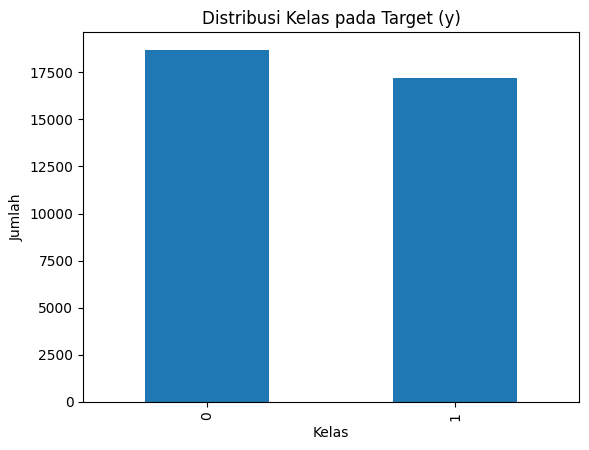

In [28]:
import matplotlib.pyplot as plt

y_resampled.value_counts().plot(kind='bar')
plt.title('Distribusi Kelas pada Target (y)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# rf = RandomForestClassifier(
#     n_estimators=300,
#     max_depth=12,
#     min_samples_split=5,
#     min_samples_leaf=2,
#     max_features='sqrt',
#     random_state=42
# )
rf = RandomForestClassifier(
    n_estimators=600,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    class_weight={0:1, 1:3}
)

# rf.fit(X_train, y_train)
rf.fit(X_resampled, y_resampled)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      4673
           1       0.58      0.40      0.47      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.66      0.68      6000
weighted avg       0.79      0.80      0.79      6000



In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_s3 = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest (SMOTE-ENN) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



=== Random Forest (SMOTE-ENN) ===
Accuracy: 0.8061666666666667
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4673
           1       0.59      0.41      0.48      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000



# Training Model

Training menggunakan logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=10)
log_model.fit(X_resampled, y_resampled)

y_pred = log_model.predict(X_test_scaled)

accuracy_LR = accuracy_score(y_test, y_pred)
classification_rep_LR = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_LR:.2f}")
print("\nClassification Report:\n", classification_rep_LR)


Accuracy: 0.50

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.43      0.57      4673
           1       0.27      0.76      0.40      1327

    accuracy                           0.50      6000
   macro avg       0.57      0.59      0.49      6000
weighted avg       0.73      0.50      0.54      6000



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Training menggunakan xgboost

In [49]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

xgb_model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_lambda=1,
    reg_alpha=0.1,
    eval_metric='logloss'

)

xgb_model.fit(X_resampled, y_resampled)

y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred)
classification_rep_xgb = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_xgb:.2f}")
print("\nClassification Report:\n", classification_rep_xgb)


Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.39      0.48      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.81      0.80      6000



In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    random_state=42
)

model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

accuracy_DT = accuracy_score(y_test, y_pred)
classification_rep_DT = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_DT:.2f}")
print("\nClassification Report:\n", classification_rep_DT)


Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      4673
           1       0.47      0.54      0.50      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.68      0.67      6000
weighted avg       0.78      0.76      0.77      6000



In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_s3 = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

rf.fit(X_resampled, y_resampled)


y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred)
classification_rep_rf = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_rf:.2f}")
print("\nClassification Report:\n", classification_rep_rf)

Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      4673
           1       0.58      0.44      0.50      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.67      0.69      6000
weighted avg       0.79      0.81      0.80      6000



## HYPERPARAMETE TUNING

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(random_state=42)

param_dist = {
    "n_estimators": [200, 300, 400],
    "max_depth": [10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
}

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,     # hanya 10 percobaan → cepat
    cv=3,
    scoring="f1_macro",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_random.fit(X_resampled, y_resampled)

y_pred = rf_random.predict(X_test)
y_pred_prob = rf_random.predict_proba(X_test)[:, 1]

accuracy_rf_ht = accuracy_score(y_test, y_pred)
classification_rep_rf_ht = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_rf_ht:.2f}")
print("\nClassification Report:\n", classification_rep_rf_ht)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      4673
           1       0.58      0.44      0.50      1327

    accuracy                           0.81      6000
   macro avg       0.71      0.68      0.69      6000
weighted avg       0.79      0.81      0.80      6000



In [55]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgb_model = xgb.XGBClassifier(
    eval_metric="logloss",
    random_state=42
)

param_dist = {
    "n_estimators": [200, 300, 400],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.03, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "scale_pos_weight": [1, 2, 3]  # penting untuk imbalance
}

xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,    # 10 kombinasi saja → cepat
    cv=3,
    scoring="f1_macro",
    verbose=1,
    n_jobs=-1
)

xgb_random.fit(X_resampled, y_resampled)

y_pred = xgb_random.predict(X_test)
y_pred_prob = xgb_random.predict_proba(X_test)[:, 1]

accuracy_xgb_ht = accuracy_score(y_test, y_pred)
classification_rep_xgb_ht = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_xgb_ht:.2f}")
print("\nClassification Report:\n", classification_rep_xgb_ht)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.38      0.47      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.79      0.81      0.80      6000



In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

log = LogisticRegression(max_iter=1000)

param_dist = {
    "C": [0.01, 0.1, 1, 5],
    "solver": ["lbfgs", "liblinear"],
    "class_weight": [None, "balanced"]
}

log_random = RandomizedSearchCV(
    estimator=log,
    param_distributions=param_dist,
    n_iter=6,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=1
)

log_random.fit(X_train_scaled, y_resampled)

y_pred = log_random.predict(X_test_scaled)
y_pred_prob = log_random.predict_proba(X_test)[:, 1]

accuracy_lr_ht = accuracy_score(y_test, y_pred)
classification_rep_lr_ht = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_lr_ht:.2f}")
print("\nClassification Report:\n", classification_rep_lr_ht)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      4673
           1       0.44      0.56      0.49      1327

    accuracy                           0.74      6000
   macro avg       0.65      0.68      0.66      6000
weighted avg       0.77      0.74      0.75      6000



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [42]:
import tensorflow as tf

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_resampled, epochs=30, batch_size=32, validation_split=0.2)

y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy_ann_ht = accuracy_score(y_test, y_pred)
classification_rep_ann_ht = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_ann_ht:.2f}")
print("\nClassification Report:\n", classification_rep_ann_ht)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7137 - loss: 0.5777 - val_accuracy: 0.5624 - val_loss: 0.7174
Epoch 2/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7636 - loss: 0.5142 - val_accuracy: 0.6265 - val_loss: 0.6513
Epoch 3/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7724 - loss: 0.4984 - val_accuracy: 0.6084 - val_loss: 0.7015
Epoch 4/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7756 - loss: 0.4951 - val_accuracy: 0.6328 - val_loss: 0.6291
Epoch 5/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7799 - loss: 0.4876 - val_accuracy: 0.6197 - val_loss: 0.6842
Epoch 6/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7840 - loss: 0.4823 - val_accuracy: 0.6314 - val_loss: 0.6749
Epoch 7/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7832 - loss: 0.4796 - val_accuracy: 0.6621 - val_loss: 0.6258
Epoch 8/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7879 - loss: 0.4752 - val_accuracy: 0.

In [58]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(range(2, 20)),
    'min_samples_split': np.arange(2, 50),
    'min_samples_leaf': np.arange(1, 50),
    'max_features': [None, 'sqrt', 'log2']
}

dt = DecisionTreeClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_resampled, y_resampled)

y_pred = random_search.predict(X_test)
y_pred_prob = random_search.predict_proba(X_test)[:, 1]

accuracy_dt_ht = accuracy_score(y_test, y_pred)
classification_rep_dt_ht = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_dt_ht:.2f}")
print("\nClassification Report:\n", classification_rep_dt_ht)


Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      4673
           1       0.49      0.43      0.46      1327

    accuracy                           0.78      6000
   macro avg       0.67      0.65      0.66      6000
weighted avg       0.77      0.78      0.77      6000



# Tabel laporan klasifikasi

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

def report_to_dataframe(y_true, y_pred, model_name):
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report_dict).transpose()
    df["model"] = model_name
    return df


In [ ]:
df_xgb = report_to_dataframe(y_test, y_pred_xgb, "XGBoost")
df_xgb = report_to_dataframe(y_test, y_pred_xgb, "XGBoost")
df_xgb = report_to_dataframe(y_test, y_pred_xgb, "XGBoost")
df_xgb = report_to_dataframe(y_test, y_pred_xgb, "XGBoost")
df_xgb = report_to_dataframe(y_test, y_pred_xgb, "XGBoost")
df_xgb = report_to_dataframe(y_test, y_pred_xgb, "XGBoost")
df_xgb = report_to_dataframe(y_test, y_pred_xgb, "XGBoost")
df_xgb = report_to_dataframe(y_test, y_pred_xgb, "XGBoost")
df_xgb = report_to_dataframe(y_test, y_pred_xgb, "XGBoost")
